# Python для Анализа данных

## Домашнее задание 9: Визуализация данных с Seaborn

In [1]:
#импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('data\datatraining.txt')    

## Вариант Light

### Задача 1

Установите (любой на ваш вкус) общий стиль графиков на весь ноутбук используя функцию set_style

In [3]:
sns.set_style('whitegrid')

### Задача 2

Подгрузите данные datatraining.txt при помощи соответствующей функции библиотеки Pandas. Преобразуйте индекс в datetime index, удалите столбец с датой. Постройте график всех парных взаимосвязей с разметкой цвета в соответствии с метками классов (столбец Occupancy)

P.S. используйте функцию sns.pairplot c параметром hue

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [5]:
df.index = pd.to_datetime(df.date)

In [6]:
df = df.drop('date', 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8143 entries, 2015-02-04 17:51:00 to 2015-02-10 09:33:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    8143 non-null   float64
 1   Humidity       8143 non-null   float64
 2   Light          8143 non-null   float64
 3   CO2            8143 non-null   float64
 4   HumidityRatio  8143 non-null   float64
 5   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 445.3 KB


In [8]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


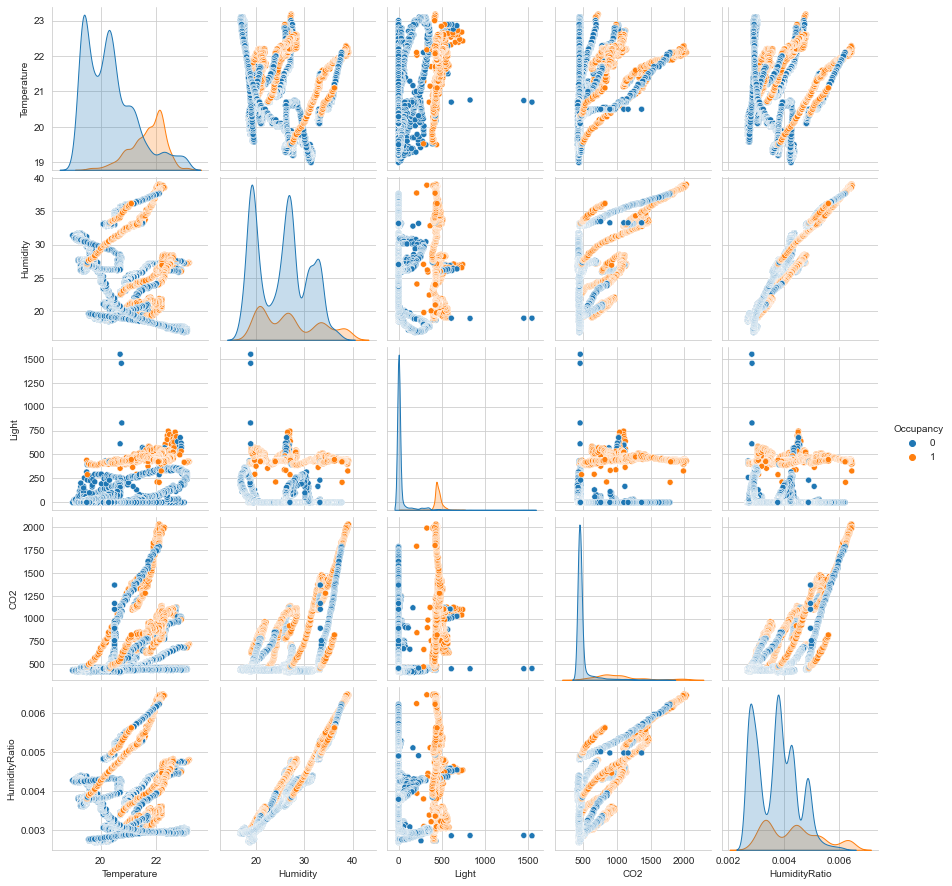

In [9]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df, hue = 'Occupancy')

### Задача 3

Постройте boxplot всех признаков.

P.S. график должен быть читаемым, т.е.
* отрегулируйте размер графика
* предварительно "отскейлите" все *числовые* признаки, т.е. приведите к стандартному нормальному распределению при помощи функции ниже (Occupancy скейлить не надо (!))

In [10]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [11]:
def scale(df):
    return (df - df.mean()) / df.std()

In [12]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


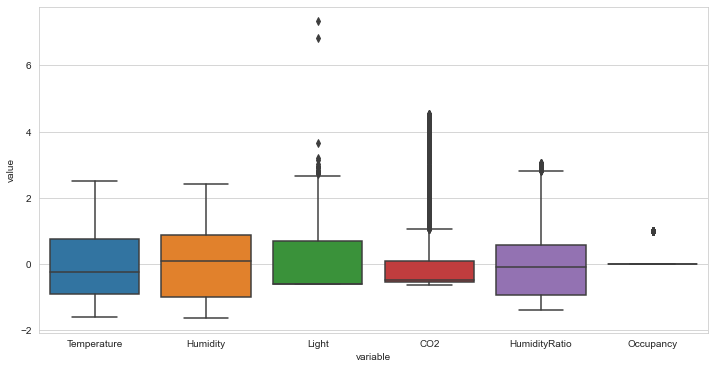

In [13]:
df['Temperature'] = scale(df['Temperature'])
df['Humidity'] = scale(df['Humidity'])
df['Light'] = scale(df['Light'])
df['CO2'] = scale(df['CO2'])
df['HumidityRatio'] = scale(df['HumidityRatio'])
plt.figure(figsize=(12,6))
data_for_plot = pd.DataFrame(data=df, columns=["Temperature", "Humidity", "Light", "CO2", "HumidityRatio","Occupancy"])
sns.boxplot(x="variable", y="value", data=pd.melt(data_for_plot));

### Задача 4

Постройте violinplot всех признаков

P.S. Предварительно приведите их к стандартному нормальному распределению как мы делали в предыдущей задаче

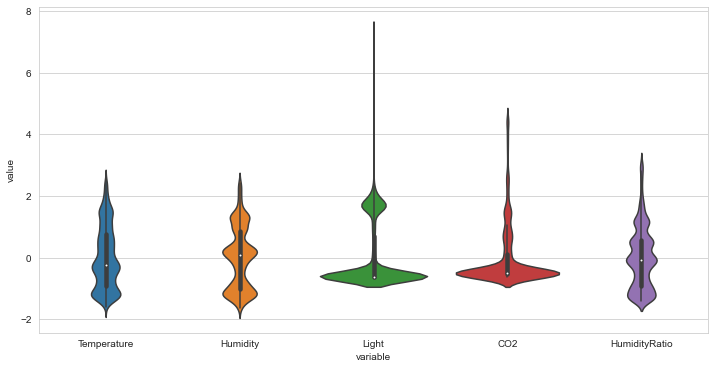

In [14]:
df = scale(df)
plt.figure(figsize=(12,6))
data_for_plot = pd.DataFrame(data=df, columns=["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"])
sns.violinplot(x="variable", y="value", data=pd.melt(data_for_plot));

### Задача 5

Нарисуйте heatmap матрицы корреляций. Отрегулируйте масштаб, подберите подходящую палитру

<AxesSubplot:>

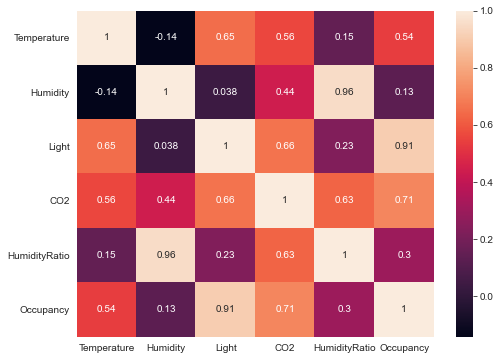

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True)

## Задачи Pro

### Задача 6

Постройте диаграмму присутствия в разбивке по часам и меткам классов. Для этого:
    * создайте новый столбец "hour", отвечающий соответствующему часу 
    * нарисуйте sns.countplot этого столбца в разбивке по Ocuupancy

In [16]:
df['hour'] = df.index 
df['hour'] = df['hour'].apply(lambda x: pd.to_datetime(x).hour)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,hour
date,,,,,,,
2015-02-04 17:51:00,2.518315,0.278509,1.573666,0.364926,1.091690,1.925929,17
2015-02-04 17:51:59,2.488814,0.277696,1.591637,0.341860,1.080489,1.925929,17
2015-02-04 17:53:00,2.488814,0.273628,1.573666,0.340269,1.075822,1.925929,17
2015-02-04 17:54:00,2.488814,0.265492,1.573666,0.323567,1.066489,1.925929,17
2015-02-04 17:55:00,2.439646,0.265492,1.573666,0.311636,1.049458,1.925929,17


<AxesSubplot:xlabel='hour', ylabel='count'>

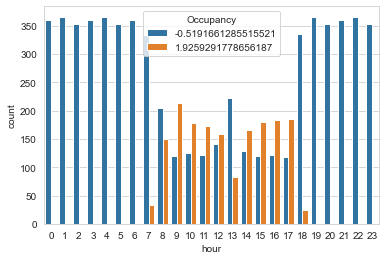

In [25]:
#df['Occupancy'].value_counts()
sns.countplot(x='hour', data=df, hue = 'Occupancy')

### Задача 7

Сделайте resample данных по получасовому интервалу с использованием усреднения для всех признаков. Обратите внимание, что столбец с метками класса Occupancy вместо усреднения нужно взять "как есть", т.е. resample c методом "asfreq" или "bfill".

Постройте jointplot между признаками Light и CO2

In [18]:
funcs = dict(Temperature ="mean", Humidity ="mean", Light="mean", CO2 ="mean", HumidityRatio ="mean", Occupancy ="bfill") 
df2 = df.copy()
df2.resample('30min').agg(funcs).dropna()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 18:00:00,2.182755,0.296207,-0.127968,0.232963,0.995812,1.925929
2015-02-04 19:00:00,1.534486,0.273809,-0.613688,-0.054179,0.753038,-0.519166
2015-02-04 19:30:00,1.312980,0.250718,-0.613688,-0.161341,0.655892,-0.519166
2015-02-04 20:30:00,0.990002,0.147374,-0.613688,-0.297985,0.444191,-0.519166
2015-02-04 21:00:00,0.874721,0.057853,-0.613688,-0.345207,0.315573,-0.519166
...,...,...,...,...,...,...
2015-02-10 06:00:00,-0.502518,1.332283,-0.613688,-0.506000,1.124620,-0.519166
2015-02-10 07:00:00,-0.327543,1.321861,-0.613688,-0.497198,1.177662,-0.519166
2015-02-10 07:30:00,-0.310656,1.319205,-0.613688,-0.491119,1.181214,-0.519166


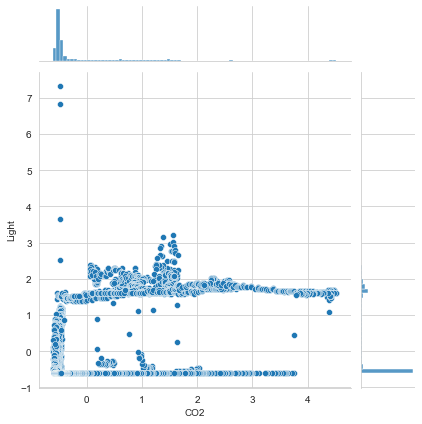

In [19]:
sns.jointplot(x="CO2", y="Light", data=df, kind="scatter");

### Задача 8

Постройте pairplot по данным после ресемплинга. В чем отличие от графиков в задаче 2? Сделайте вывод

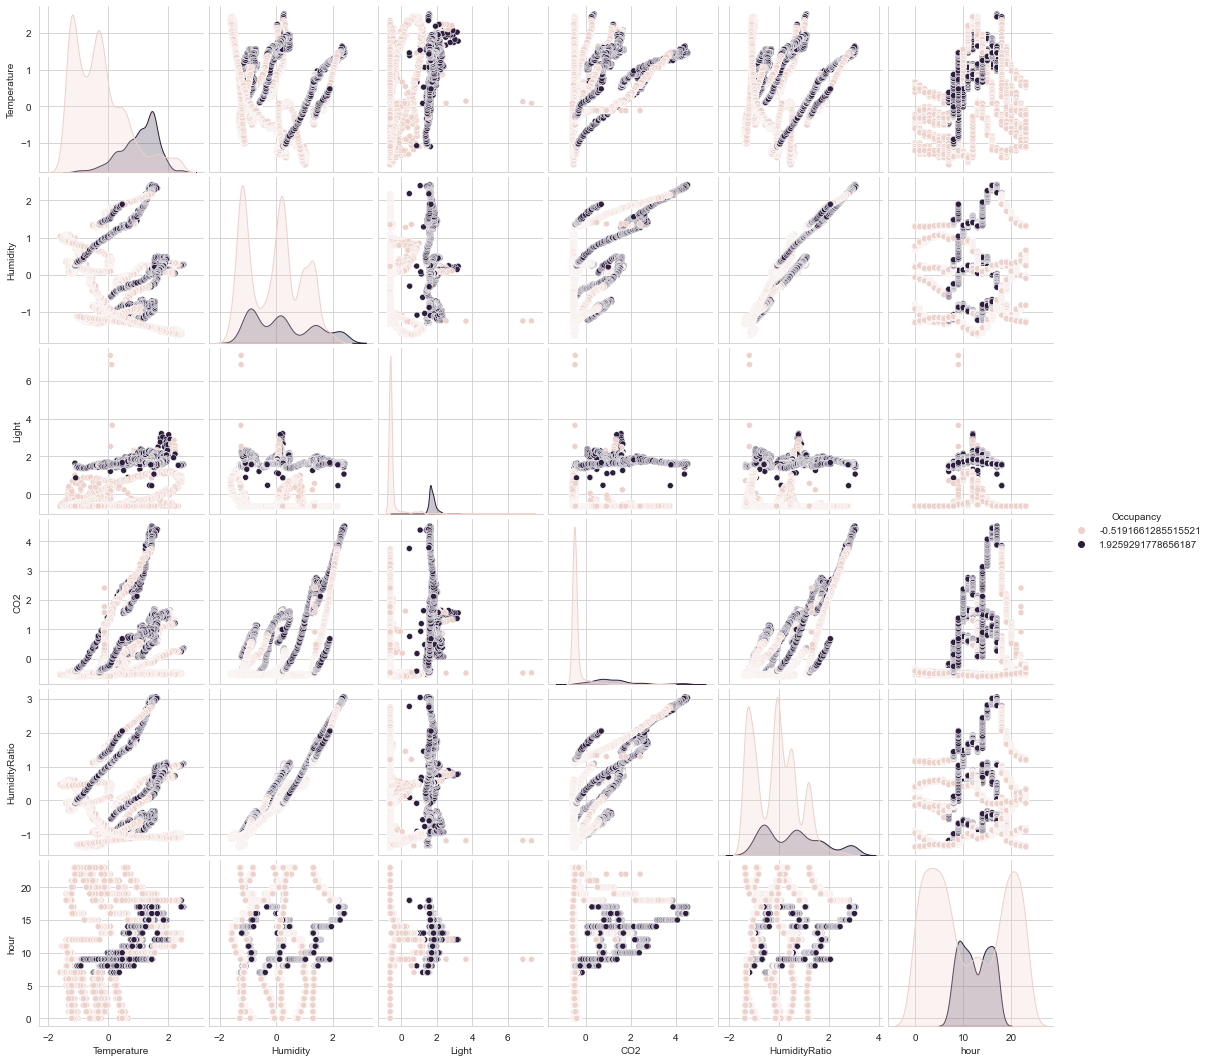

In [20]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df, hue = 'Occupancy')

### Задача 9

Постройте boxplot всех признаков с разбивкой по Occupancy. Для правильной отрисовки необходимо:
    * создать новый текстовый столбец с расшифровкой столбца Occupancy, например, если 0 - то 'No', если 1 - то 'Yes
    * передать этот столбец в качестве соответствующего параметра боксплоту
    * для каждого признака нужен отдельный график

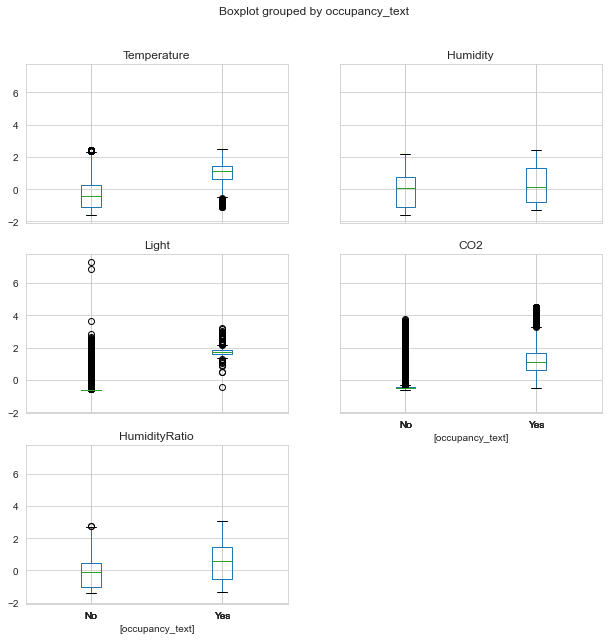

In [23]:
df['occupancy_text'] = df['Occupancy']
df['occupancy_text'] = df['occupancy_text'].apply(lambda x: 'Yes' if x > 0 else 'No')
all_columns = ["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"]
boxplot = df.boxplot(by = ['occupancy_text'], column = all_columns, figsize=(10,10))

### Задача 10

Принимая во внимание все построенные выше графики, сделайте вывод о взаимосвязях в данных (напишите несколько предложений о том, что вы заметили)